In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the dataset and assign it to 'df'
df=pd.read_csv('dataset.csv')
# first 5 values of the dataset
df = df.drop(columns=['step','nameOrig', 'nameDest', 'isFlaggedFraud'])
df.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.0,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0
5,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0
6,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0
7,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0
8,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0
9,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0


In [3]:
df.shape

(6362620, 7)

In [4]:
df['isFraud']=df['isFraud'].map({0:'No Fraud',1:'Fraud'})
# df['isFraud']=df['isFraud'].map({'No Fraud':0,'Fraud':1})

In [27]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.0,0.0,No Fraud
1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.0,No Fraud
2,TRANSFER,181.00,181.00,0.00,0.0,0.0,Fraud
3,CASH_OUT,181.00,181.00,0.00,21182.0,0.0,Fraud
4,PAYMENT,11668.14,41554.00,29885.86,0.0,0.0,No Fraud
...,...,...,...,...,...,...,...
3862,PAYMENT,20781.99,197549.00,176767.01,0.0,0.0,No Fraud
3863,PAYMENT,2210.24,176767.01,174556.77,0.0,0.0,No Fraud
3864,PAYMENT,10696.23,11100.00,403.77,0.0,0.0,No Fraud
3865,PAYMENT,18799.10,257010.00,238210.90,0.0,0.0,No Fraud


In [11]:
accountCount = df.groupby('isFraud')
print(accountCount.size())

isFraud
Fraud          8213
No Fraud    6354407
dtype: int64


In [12]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

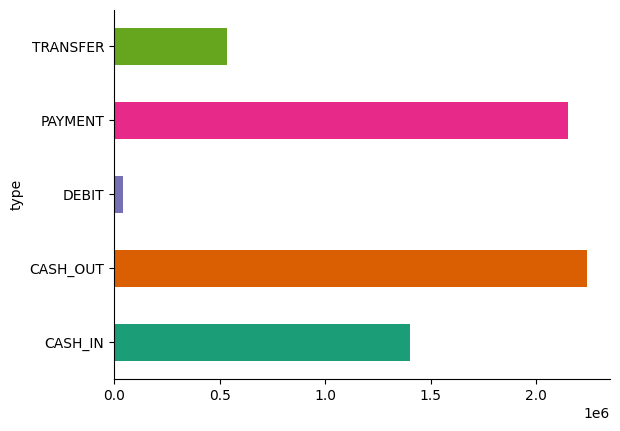

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

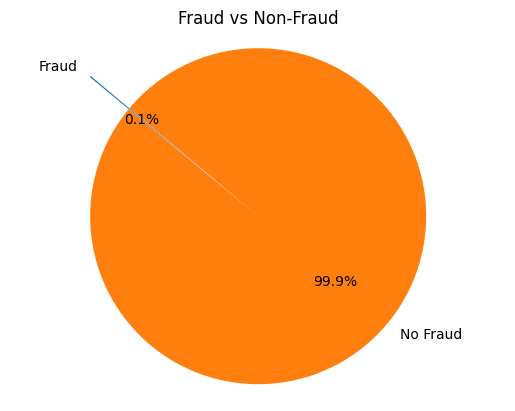

In [17]:
acc_fraud = 8213  
acc_no_fraud = 6354407  

labels = ['Fraud', 'No Fraud']
sizes = [acc_fraud, acc_no_fraud]
explode = (0.3, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Fraud vs Non-Fraud')

plt.show()

C:\Users\srini\AppData\Local\Temp\ipykernel_3132\282653145.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_methods, y=frequencies, palette='viridis')


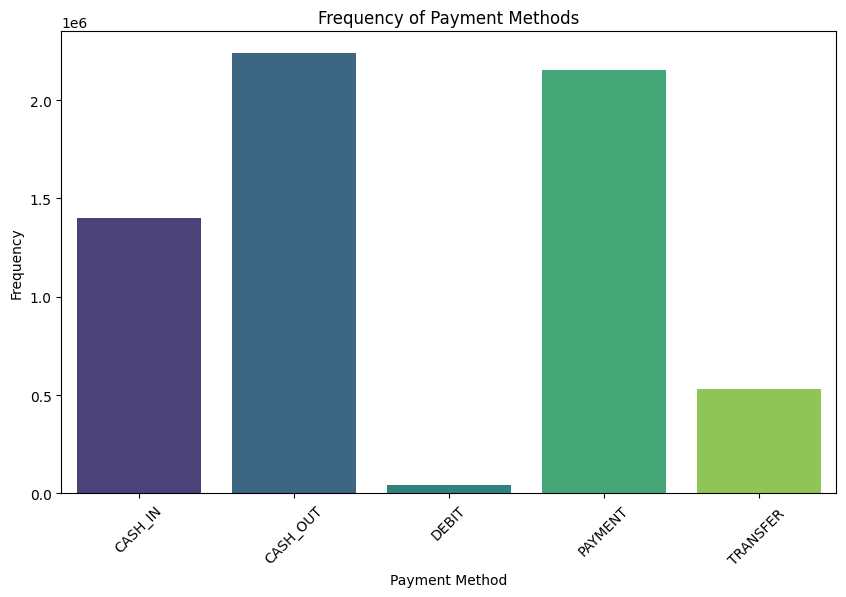

In [18]:
payment_methods = ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER ']
frequencies = [1399284, 2237500, 41432, 2151495, 532909]
# CASH_OUT    2237500
# PAYMENT     2151495
# CASH_IN     1399284
# TRANSFER     532909
# DEBIT         41432

# Bar Graph
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_methods, y=frequencies, palette='viridis')
plt.title('Frequency of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

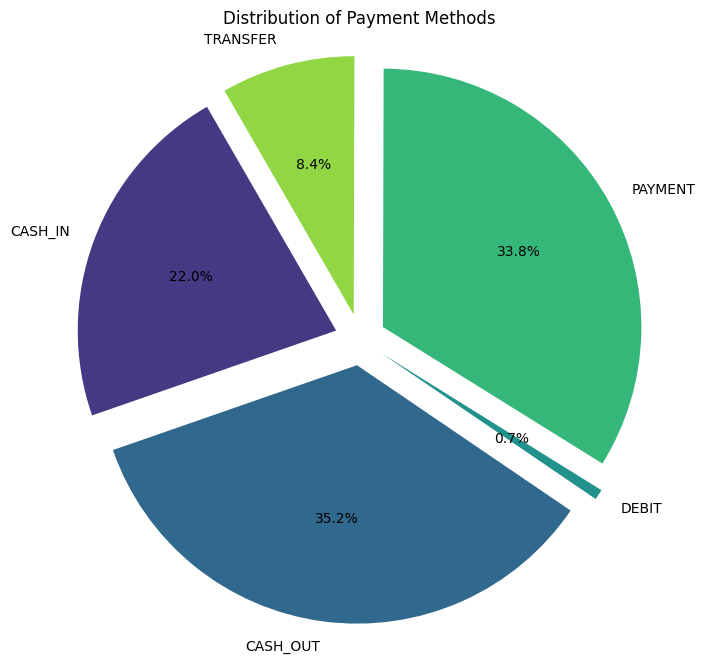

In [32]:
plt.figure(figsize=(8, 8))
plt.pie(frequencies,explode=[0.1,0.1,0.1,0.1,0.1], labels=payment_methods, autopct='%1.1f%%', startangle=120, colors=sns.color_palette('viridis', len(payment_methods)))
plt.title('Distribution of Payment Methods')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()